# Static Turing test
## The participants were asked to grade how confident they are whether presented text was human or machine-generated.

In [ ]:
# TODO libs imports
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
from scipy.stats import ttest_ind
import csv
import urllib.request
import pandas as pd
import os
from google.colab import drive
%matplotlib inline

In [ ]:
# Mounting the Drive to get access to csv
# mount my Google Drive directory and access the training data located there
gdrive_dir = '/content/drive/'
data_dir = os.path.join(gdrive_dir, "'My Drive'","'Colab Notebooks'")

drive.mount(gdrive_dir, force_remount=True)

Mounted at /content/drive/


In [ ]:
# Explore
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/survey_data/Edited_Survey.csv')
df.head

<bound method NDFrame.head of      Python_machine  ...                                            Comment
0     highly likely  ...                                                NaN
1          unlikely  ...                                                NaN
2     highly likely  ...                                                NaN
3            likely  ...                                                NaN
4   highly unlikely  ...                                                NaN
5     highly likely  ...                                                NaN
6            likely  ...                                                NaN
7     highly likely  ...                                                NaN
8            likely  ...  To my mind it is quite impressive that machine...
9   highly unlikely  ...                                                NaN
10    highly likely  ...                                                 хз
11         unlikely  ...  Lots of unnecessary punctuation,

In [ ]:
# Mapping String values to Integers for future work
int_map = {'highly likely': 2, 'likely': 1, 'unlikely': -1, 'highly unlikely': -2}

In [ ]:
# TODO import 2 dfs 1 for machine 2 for human, replace str with ints
# df1 is representation of 'Python_machine', 'HTML_machine', 'CSS_machine'
df1 = df[['Python_machine', 'HTML_machine', 'CSS_machine']]
df1.Python_machine = [int_map[item] for item in df1.Python_machine]
df1.HTML_machine = [int_map[item] for item in df1.HTML_machine]
df1.CSS_machine = [int_map[item] for item in df1.CSS_machine]
df1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Python_machine,HTML_machine,CSS_machine
0,2,-1,-1
1,-1,2,1
2,2,2,-1
3,1,-1,1
4,-2,-2,-2


In [ ]:
# df2 is representation of 'Python_human', 'HTML_human', 'CSS_human'
df2 = df[['Python_human', 'HTML_human', 'CSS_human']]
df2.Python_human = [int_map[item] for item in df2.Python_human]
df2.HTML_human = [int_map[item] for item in df2.HTML_human]
df2.CSS_human = [int_map[item] for item in df2.CSS_human]
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Python_human,HTML_human,CSS_human
0,-1,1,2
1,1,2,-2
2,2,-2,-2
3,-2,-1,-1
4,1,1,1


In [ ]:
df1_comb = ((df1.Python_machine).append(df1.HTML_machine)).append(df1.CSS_machine).reset_index(drop=True)
df1_comb

0     2
1    -1
2     2
3     1
4    -2
     ..
67   -2
68    2
69    1
70    1
71    1
Length: 72, dtype: int64

In [ ]:
df2_comb = ((df2.Python_human).append(df2.HTML_human)).append(df2.CSS_human).reset_index(drop=True)
df2_comb

0    -1
1     1
2     2
3    -2
4     1
     ..
67    1
68   -2
69    2
70   -2
71   -2
Length: 72, dtype: int64

In [ ]:
df2_comb.to_xarray

<bound method NDFrame.to_xarray of 0    -1
1     1
2     2
3    -2
4     1
     ..
67    1
68   -2
69    2
70   -2
71   -2
Length: 72, dtype: int64>

(0.0, 30.0)

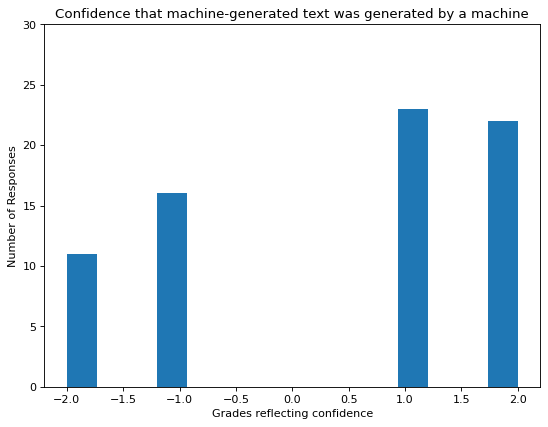

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.title("Confidence that machine-generated text was generated by a machine")
plt.hist(df1_comb, bins=15)
plt.ylabel('Number of Responses')
plt.xlabel('Grades reflecting confidence')
plt.ylim(0,30)

(0.0, 30.0)

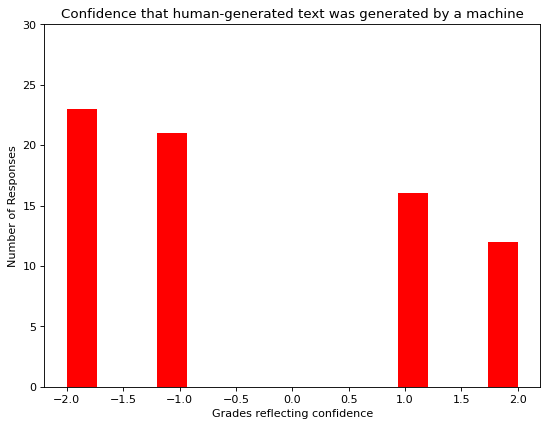

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.title("Confidence that human-generated text was generated by a machine")
plt.hist(df2_comb, bins=15, color="red")
plt.ylabel('Number of Responses')
plt.xlabel('Grades reflecting confidence')
plt.ylim(0,30)

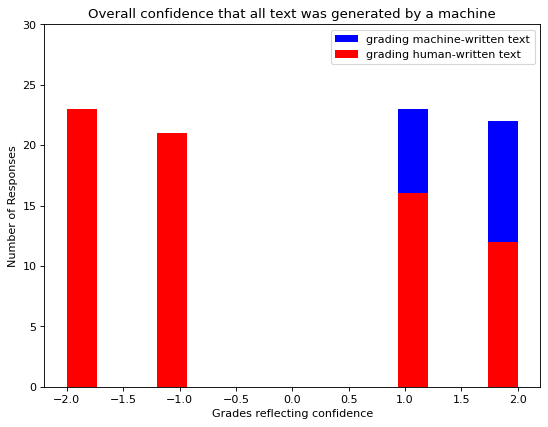

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.title("Overall confidence that all text was generated by a machine")
plt.hist(df1_comb, bins=15, color="blue")
plt.hist(df2_comb, bins=15, color="red")
plt.ylabel('Number of Responses')
plt.xlabel('Grades reflecting confidence')
plt.legend(['grading machine-written text','grading human-written text'])
plt.ylim(0,30)
plt.show()

In [ ]:
# Basic stats for Machine-generated text
df1_comb.describe()

count    72.000000
mean      0.402778
std       1.497977
min      -2.000000
25%      -1.000000
50%       1.000000
75%       2.000000
max       2.000000
dtype: float64

In [ ]:
# Basic stats for Human-generated text
df2_comb.describe()

count    72.000000
mean     -0.375000
std       1.533086
min      -2.000000
25%      -2.000000
50%      -1.000000
75%       1.000000
max       2.000000
dtype: float64

In [ ]:
# T-test
ttest_ind(df1_comb, df2_comb)

Ttest_indResult(statistic=3.079021156962203, pvalue=0.0024936673037785997)

# Assessing the quality of machine-generated text

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/survey_data/Edited_Survey_QuantA.csv')
df.head()

,Python_machine,Python_human,HTML_machine,HTML_human,CSS_machine,CSS_human,Q1,Q2,Q3,Q4,Q5,Q6,Comment
0,highly likely,unlikely,unlikely,likely,unlikely,highly likely,neither,strongly disagree,disagree,neither,disagree,neither,NaN
1,unlikely,likely,highly likely,highly likely,likely,highly unlikely,agree,strongly agree,disagree,agree,strongly agree,strongly agree,NaN
2,highly likely,highly likely,highly likely,highly unlikely,unlikely,highly unlikely,agree,neither,disagree,disagree,disagree,agree,NaN
3,likely,highly unlikely,unlikely,unlikely,likely,unlikely,disagree,strongly disagree,neither,agree,neither,disagree,NaN
4,highly unlikely,likely,highly unlikely,likely,highly unlikely,likely,strongly disagree,strongly disagree,strongly disagree,strongly disagree,strongly disagree,strongly disagree,NaN


In [ ]:
df_qt = ((df.Q1).append(df.Q2).append(df.Q3).append(df.Q4).append(df.Q5).append(df.Q6)).reset_index(drop=True).dropna()
df_qt

0                neither
1                  agree
2                  agree
3               disagree
4      strongly disagree
             ...        
139             disagree
140             disagree
141                agree
142             disagree
143       strongly agree
Length: 138, dtype: object

In [ ]:
# Mapping String values to Integers for future work
int_map2 = {'strongly disagree': -2, 'disagree': -1, 'neither': 0, 'agree': 1, 'strongly agree':2}

In [ ]:
df_qt_num_mean = sum(df_qt_num) / len(df_qt_num)

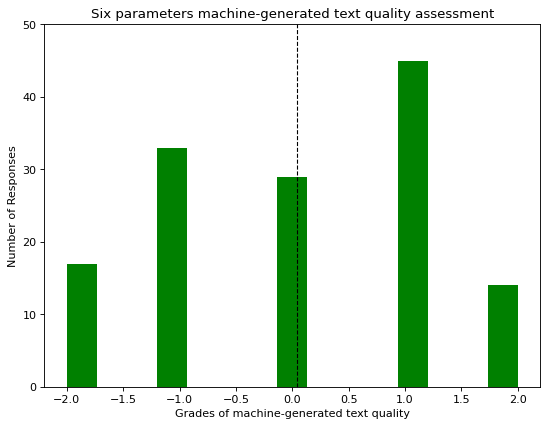

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.title("Six parameters machine-generated text quality assessment")
plt.hist(df_qt_num, bins=15, color = 'green')
plt.ylabel('Number of Responses')
plt.xlabel('Grades of machine-generated text quality')
plt.axvline(df_qt_num_mean, color='k', linestyle='dashed', linewidth=1)
plt.ylim(0,50)
plt.show()